In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = pd.read_csv("student_stress.csv")
df

,Student_ID,Age,Gender,Study_Hours,Sleep_Hours,Heart_Rate,Blood_Pressure,Anxiety_Level,Depression_Level,Stress_Score,Expenses_USD
0,1,20,F,6,7.0,75,120/80,3,2,45,200.0
1,2,22,M,8,6.0,88,135/90,6,4,70,250.0
2,3,19,F,5,NaN,95,140/95,8,7,85,180.0
3,4,21,M,7,8.0,72,118/79,2,2,35,210.0
4,5,23,F,9,4.0,200,145/92,9,8,90,300.0
5,6,20,M,4,6.0,80,125/85,5,4,60,220.0
6,7,22,F,10,5.0,92,138/88,7,6,78,NaN
7,8,21,M,3,7.0,68,115/75,2,1,30,190.0
8,9,19,F,6,6.0,85,130/85,6,5,65,230.0
9,10,20,M,7,7.0,76,121/81,4,3,50,240.0


In [20]:
X = df[['Study_Hours']]   # independent 
y = df['Stress_Score']    # dependent 

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: 7.075840500390932
Intercept: 17.93979671618451


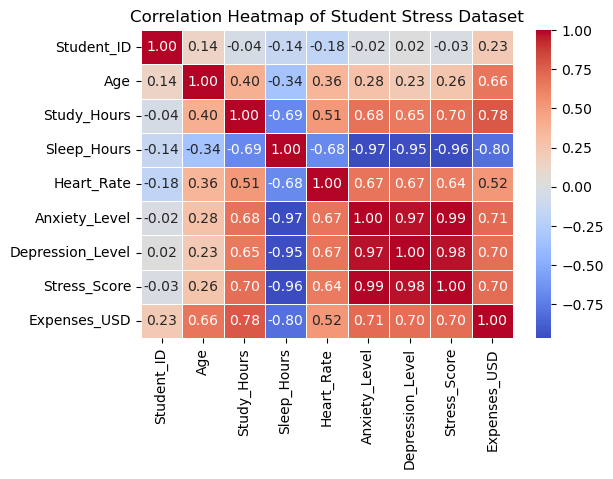

In [13]:
# Correlation Matrix
corr_matrix = df.corr(numeric_only=True)   # Only numeric columns

# Heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Student Stress Dataset")
plt.show()

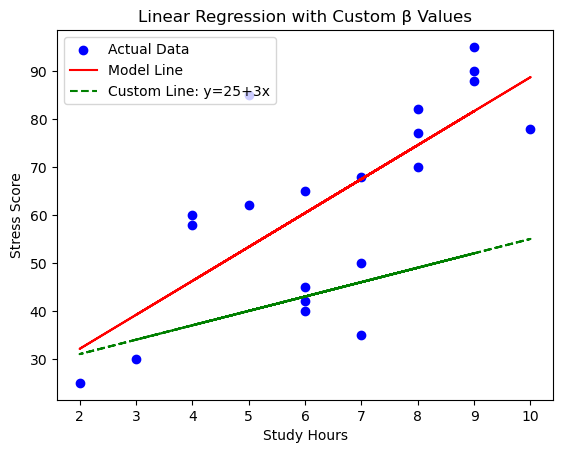

In [32]:
#changing the parameters
# y = β0 + β1x
beta0 = 25  # Intercept 
beta1 = 3     # Slope

y_model = model.predict(X)                 
y_custom = beta0 + beta1 * df['Study_Hours'] 

# Visualization

# Scatter Plot
plt.scatter(df['Study_Hours'], df['Stress_Score'], color='blue', label="Actual Data")
plt.plot(df['Study_Hours'], y_model, color='red', label="Model Line")
plt.plot(df['Study_Hours'], y_custom, color='green', linestyle='--', label=f"Custom Line: y={beta0}+{beta1}x")

plt.title("Linear Regression with Custom β Values")
plt.xlabel("Study Hours")
plt.ylabel("Stress Score")
plt.legend()
plt.show()